In [1]:
from network import *
import numpy as np
import random
import matplotlib.pyplot as plt

We're going to be training an incredibly simple neural network where the model learns to predict the linear function y = m*x + b

In [2]:
m = 2
b = 1
def generate_training_example():
    model_in = np.random.randint(low=-10, high=10, size=(1, 1))
    model_out = m * model_in + b # np.sin(model_in)
    return model_in, model_out[0]

In [3]:
model = Sequential([
    Layer(1, 1)
],
criterion=MSELoss())

In [4]:
data = [generate_training_example() for _ in range(100)]

In [5]:
losses = []
for _ in range(100):
    model_in, model_out = random.choice(data)
    # print("X:", model_in, " Y:", model_out)
    # print("Current weights:", model.modules[0].weights)
    pred_out = model.forward(model_in)
    # print("Predicted:", pred_out)
    loss = model.calculate_loss(model_out, pred_out)
    losses.append(loss)
    # print("Loss:", loss)
    model.backward()
    # print("Gradients:", model.modules[0].grad)
    model.SGD_step(alpha=0.01)
    # print("New weights:", model.modules[0].weights)

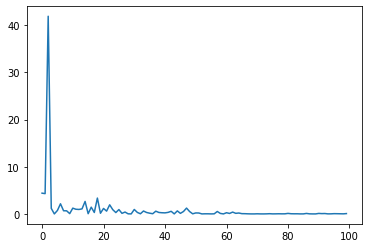

In [6]:
plt.plot(range(len(losses)), losses)